# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc =1.2
my_eth =5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Execute create deck url
btc = requests.get(btc_url).json()
eth = requests.get(eth_url).json()
print(json.dumps(btc, indent=4))
print(json.dumps(eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18743700,
            "total_supply": 18743700,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 34774.0,
                    "volume_24h": 34375654487,
                    "market_cap": 652577238601,
                    "percentage_change_1h": 0.481405866472671,
                    "percentage_change_24h": 7.63695224582409,
                    "percentage_change_7d": -2.83114091611169,
                    "percent_change_1h": 0.481405866472671,
                    "percent_change_24h": 7.63695224582409,
                    "percent_change_7d": -2.83114091611169
                },
                "CAD": {
                    "price": 42758.1104,
                    "volume_24h": 42268304757.2152,
                    "

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = btc["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)
# Fetch current ETH price
# YOUR CODE HERE!
eth_price = eth["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

34774.0
1988.81
The current value of your 1.2 BTC is $41728.80
The current value of your 5.3 ETH is $10540.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
##### Set current amount of shares
# Set current amount of shares data
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-06-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_investment = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df


# Preview DataFrame
# YOUR CODE HERE!
df_investment.head()

AGG                                       SPY  \
                            open    high      low   close   volume    open   
2021-06-24 00:00:00-04:00  115.1  115.17  115.045  115.07  6672880  424.89   

                                                             
                             high     low   close    volume  
2021-06-24 00:00:00-04:00  425.55  424.62  425.09  39863529

In [14]:

# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_investment["AGG"]["close"][0])
spy_close_price = float(df_investment["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.07
Current SPY closing price: $425.09


In [15]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21254.50
The current value of your 200 AGG shares is $23014.00


### Savings Health Analysis

In [16]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
savings_data = [
    my_btc_value + my_eth_value,
    my_agg_value + my_spy_value
]


# Create savings DataFrame
# YOUR CODE HERE!

df_savings = pd.DataFrame(savings_data, columns=["amount"], index =["crypto", "shares"])


# Display savings DataFrame
display(df_savings)

,amount
crypto,52269.493
shares,44268.500


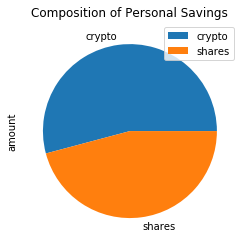

In [17]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratution! You have enough money in your emergency fund.")
elif total_saving == emergency_fund:
    print("Great, You have saved three times your monthly expenses! keep pusing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_saving):0.2f} away from your emergency fund goal, continue savings between 10% and 20% of your monthly income to reach your goal")

Congratution! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

ticker= ["SPY", "AGG"]

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_thrity_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)


In [30]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_thrity_year.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_thrity_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994778,1.001622,1.001614,0.988460,0.994909,0.998289,1.002074,0.995435,0.985849,1.003471,...,1.000820,1.011516,0.991879,1.006576,0.988916,0.996574,0.992971,1.001187,1.000415,0.993362
2,0.989039,0.999393,1.012972,0.982052,1.002279,0.999296,0.993660,0.997678,0.997522,1.002113,...,0.999594,1.012141,0.992259,1.007431,0.993411,0.993874,0.995784,1.013657,1.017889,0.989972
3,0.982947,1.000378,1.029510,0.983149,1.012073,1.011857,0.981739,0.995737,0.985879,1.000613,...,1.005615,1.019249,0.978868,1.015604,0.986155,0.993107,0.994523,1.016337,1.030692,0.984266
4,0.987681,1.000204,1.034332,0.984019,1.017669,1.011259,0.978519,0.994337,0.985574,1.003215,...,0.992833,1.015061,0.977414,1.024400,0.990832,0.995329,0.999116,1.021950,1.031164,0.980237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,30.626238,7.498165,41.460987,9.399768,15.134150,30.833823,17.867439,55.514463,127.851633,22.830336,...,22.295155,11.659597,22.618366,24.211870,36.971712,5.238031,3.097507,45.233783,32.529794,10.206102
7557,30.688852,7.452807,40.708868,9.435738,15.128975,30.870187,17.719308,56.099787,128.543825,23.292266,...,22.285955,11.582682,22.622212,23.977564,36.876967,5.159868,3.121783,45.516993,32.802492,10.241083
7558,30.689889,7.581365,40.120045,9.453217,15.183630,30.768834,17.478564,55.744142,129.992591,23.162175,...,22.407191,11.586977,22.706259,24.259067,37.067470,5.150831,3.149577,45.573498,32.788719,10.161800
7559,30.235343,7.578273,40.696421,9.436668,15.135523,30.595273,17.600617,55.779317,129.856360,23.389714,...,22.617835,11.538194,22.831177,24.352723,36.996243,5.141431,3.133798,45.142097,33.065524,10.078240


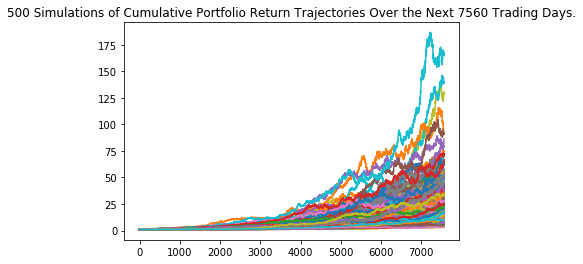

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_thrity_year.plot_simulation()

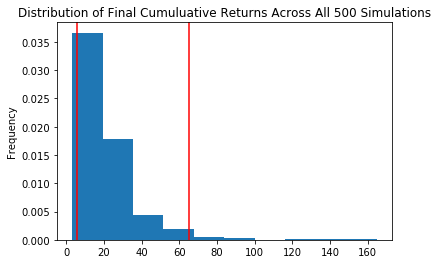

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dis_plot = mc_thrity_year.plot_distribution()


### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = mc_thrity_year.summarize_cumulative_return()


# Print summary statistics
# YOUR CODE HERE!
print(tbl)


count           500.000000
mean             21.250624
std              17.067748
min               3.030128
25%              10.881078
50%              16.550275
75%              26.606956
max             164.744799
95% CI Lower      5.349321
95% CI Upper     65.177760
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $106986.43 and $1303555.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = float(round(tbl[8]*initial_investment,2))
ci_upper = float(round(tbl[9]*initial_investment,2))

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $160479.64 and $1955332.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80, .20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)


In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006711,1.007068,0.996796,0.998509,1.001112,0.998178,0.996266,1.005571,0.989571,1.004750,...,1.001068,1.002881,1.000994,0.997727,0.998779,1.002474,1.001600,1.007238,1.007329,1.003802
2,1.012356,1.003390,0.999599,0.997702,1.002529,1.001079,0.998817,1.003665,0.989811,1.001039,...,0.999746,1.002932,0.996788,0.991760,1.001640,1.003047,0.997559,1.012473,1.003605,1.007357
3,1.016770,1.005496,1.000720,1.001420,1.007516,1.000334,1.003347,1.003678,0.987661,1.000908,...,1.005210,1.004933,0.994161,0.990904,1.001843,1.001664,1.002113,1.013127,1.006935,1.008468
4,1.016480,1.000229,1.009481,0.996359,1.007198,1.004449,1.001508,0.999817,0.990740,0.994397,...,1.007922,1.005634,1.001073,0.994848,0.998367,1.011010,1.002898,1.015282,1.002221,1.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.449052,1.147905,1.141376,1.214037,1.081288,1.074807,1.209833,1.143152,1.074074,1.123329,...,1.319238,1.182817,1.032966,1.079252,1.346075,1.096814,1.064937,1.138429,1.090688,1.401984
1257,1.446303,1.149414,1.139129,1.217935,1.081181,1.070357,1.207590,1.136282,1.070170,1.120697,...,1.320803,1.182490,1.040548,1.083251,1.349271,1.094366,1.069457,1.144366,1.090868,1.400879
1258,1.443789,1.153743,1.142608,1.216524,1.073104,1.076135,1.205650,1.141830,1.066663,1.119324,...,1.319379,1.183652,1.041681,1.085671,1.350991,1.087971,1.072546,1.142102,1.085334,1.410846
1259,1.453480,1.148426,1.141175,1.218344,1.079674,1.069927,1.205513,1.139441,1.061828,1.126085,...,1.312581,1.177973,1.042495,1.092566,1.352725,1.086249,1.068016,1.138333,1.084766,1.409368


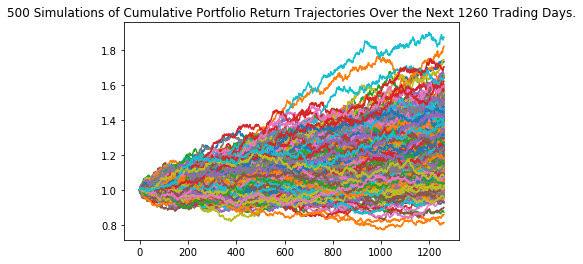

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_five_year.plot_simulation()

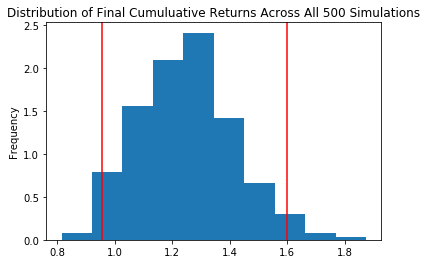

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dis_plot = mc_five_year.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = mc_five_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.248653
std               0.169127
min               0.814417
25%               1.128289
50%               1.244022
75%               1.349548
max               1.874488
95% CI Lower      0.956785
95% CI Upper      1.599730
Name: 1260, dtype: float64


In [42]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57407.08 and $95983.78


### Ten Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 10
)



In [44]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997957,1.005751,0.998761,1.003076,0.994624,1.004050,0.996948,0.997975,1.005572,0.998679,...,0.998343,0.994587,0.991564,0.996879,0.997718,1.002849,1.006236,0.994612,0.997566,1.004353
2,0.999553,1.003929,0.994949,1.000361,0.993857,0.998518,1.001258,0.999555,1.012730,0.995218,...,0.995340,0.984903,0.987241,0.997091,0.990934,0.998380,1.007637,1.000546,1.001975,1.007176
3,1.008658,1.013002,1.001728,1.006179,0.994139,0.991416,0.999806,1.001072,1.014128,0.985993,...,0.991084,0.978920,0.990313,0.994760,0.999146,0.991088,1.002812,0.999300,1.015676,1.002470
4,1.006194,1.007122,0.994903,1.014390,0.992527,0.991577,1.008914,0.998595,1.023647,0.971234,...,0.993653,0.981647,0.993730,0.992834,1.002713,0.988643,1.005378,1.006461,1.017644,1.000601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.882409,2.644891,2.846552,2.080394,1.602064,2.134950,2.079895,2.022683,1.616461,2.249107,...,2.343046,1.999029,1.345394,1.757241,2.280321,2.365761,2.009915,1.433691,1.869628,1.921974
2517,1.887194,2.634486,2.827487,2.094535,1.608480,2.154187,2.073143,2.027006,1.618685,2.263309,...,2.329279,1.990291,1.342023,1.751424,2.290100,2.385045,2.016596,1.432854,1.886312,1.901452
2518,1.895673,2.643516,2.827597,2.093899,1.616614,2.147062,2.074316,2.041728,1.622776,2.271877,...,2.334840,1.984105,1.342385,1.753947,2.289577,2.382467,2.019607,1.446064,1.882366,1.909938
2519,1.887589,2.661136,2.844944,2.103304,1.619271,2.155487,2.075976,2.035020,1.615097,2.255975,...,2.331507,1.959021,1.346285,1.748821,2.286548,2.362659,2.023389,1.453490,1.876650,1.907841


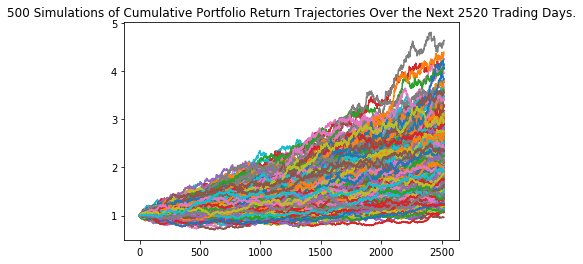

In [45]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10year = mc_ten_year.plot_simulation()



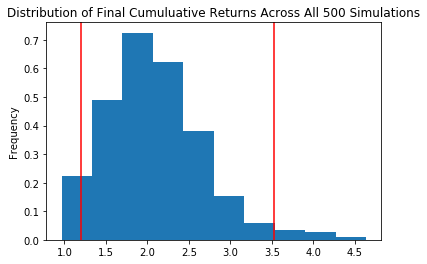

In [46]:
dis_ploy_10year = mc_ten_year.plot_distribution()

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*7000,2)
ci_upper_ten = round(tbl[9]*7000,2)


In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10year = mc_ten_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.248653
std               0.169127
min               0.814417
25%               1.128289
50%               1.244022
75%               1.349548
max               1.874488
95% CI Lower      0.956785
95% CI Upper      1.599730
Name: 1260, dtype: float64


In [49]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 7000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $7000 in the portfolio over the next 10 years will end within in the range of $6697.49 and $11198.11
